# Exploratory Data Analysis

...with [Altair](https://altair-viz.github.io/) for the first time

Inspiration :
- https://www.kaggle.com/artgor/eda-and-models

## Prerequisites

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.dataset.make_dataset import Dataset
from src.features.build_features import create_date

from tqdm import tqdm_notebook

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import altair as alt
from altair.vega import v5
alt.renderers.enable('notebook') # for the notebook only 

import warnings
warnings.filterwarnings("ignore")

In [3]:
ds = Dataset()
ds.load_dataset()
create_date(ds)

## Identity information

In [17]:
ds.identity_cols

['id_01',
 'id_02',
 'id_03',
 'id_04',
 'id_05',
 'id_06',
 'id_07',
 'id_08',
 'id_09',
 'id_10',
 'id_11',
 'id_12',
 'id_13',
 'id_14',
 'id_15',
 'id_16',
 'id_17',
 'id_18',
 'id_19',
 'id_20',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_32',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'DeviceInfo']

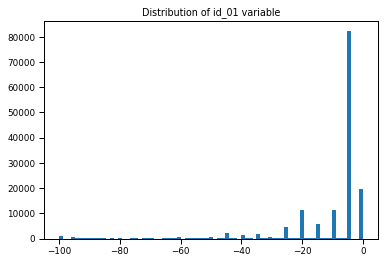

In [5]:
plt.hist(ds.X_train['id_01'], bins=77);
plt.title('Distribution of id_01 variable');

In [6]:
ds.X_train['id_03'].value_counts(dropna=False, normalize=True).head()

NaN    0.887689
0.0    0.108211
1.0    0.001461
3.0    0.001131
2.0    0.000713
Name: id_03, dtype: float64

In [7]:
ds.X_train['id_11'].value_counts(dropna=False, normalize=True).head()

NaN           0.761273
100.000000    0.225492
95.080002     0.002085
95.160004     0.001277
97.120003     0.000745
Name: id_11, dtype: float64

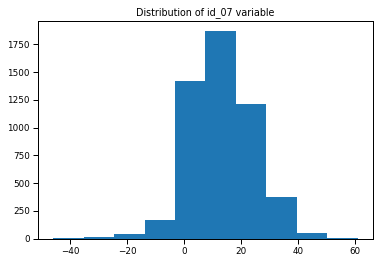

In [8]:
plt.hist(ds.X_train['id_07']);
plt.title('Distribution of id_07 variable');

In [9]:
charts = {}
for i in ['id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']:
    feature_count = ds.X_train[i].value_counts(dropna=False).reset_index().rename(columns={i: 'count', 'index': i})
    chart = alt.Chart(feature_count).mark_bar().encode(
                y=alt.Y(f"{i}:N", axis=alt.Axis(title=i)),
                x=alt.X('count:Q', axis=alt.Axis(title='Count')),
                tooltip=[i, 'count']
            ).properties(title=f"Counts of {i}", width=400)
    charts[i] = chart                         

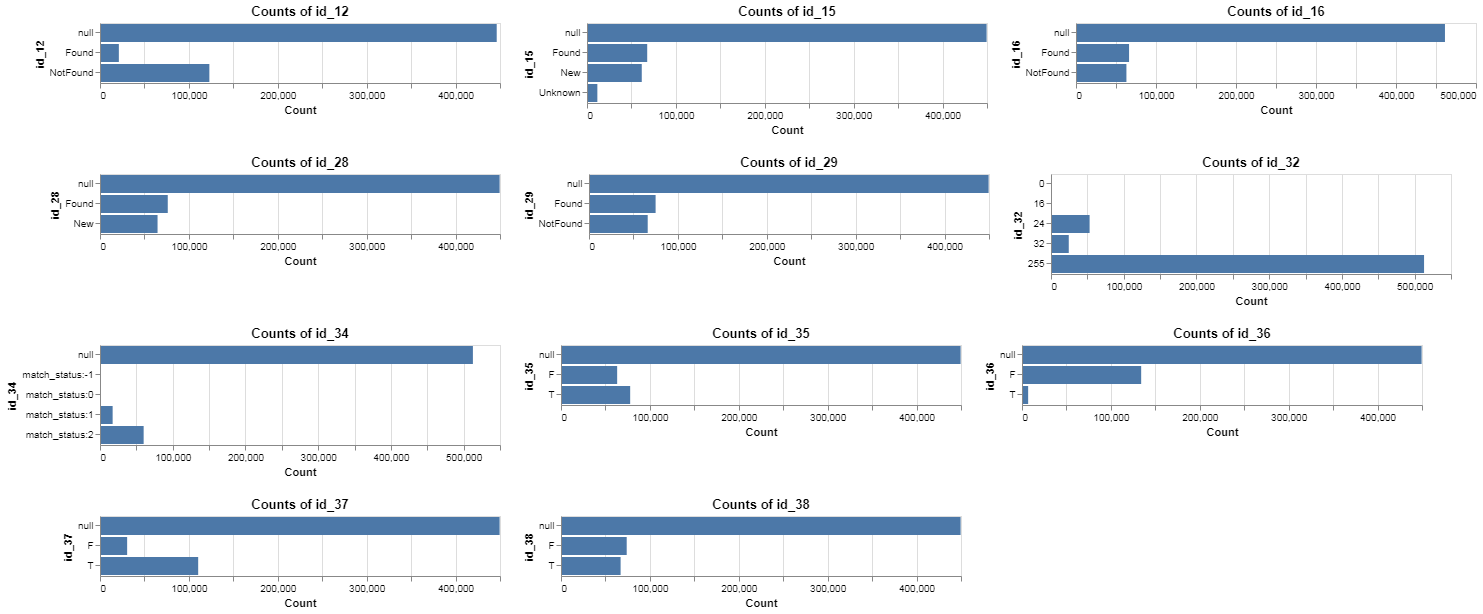

In [10]:
(charts['id_12'] | charts['id_15'] | charts['id_16']) & (charts['id_28'] | charts['id_29'] | charts['id_32']) & (charts['id_34'] | charts['id_35'] | charts['id_36']) & (charts['id_37'] | charts['id_38'])

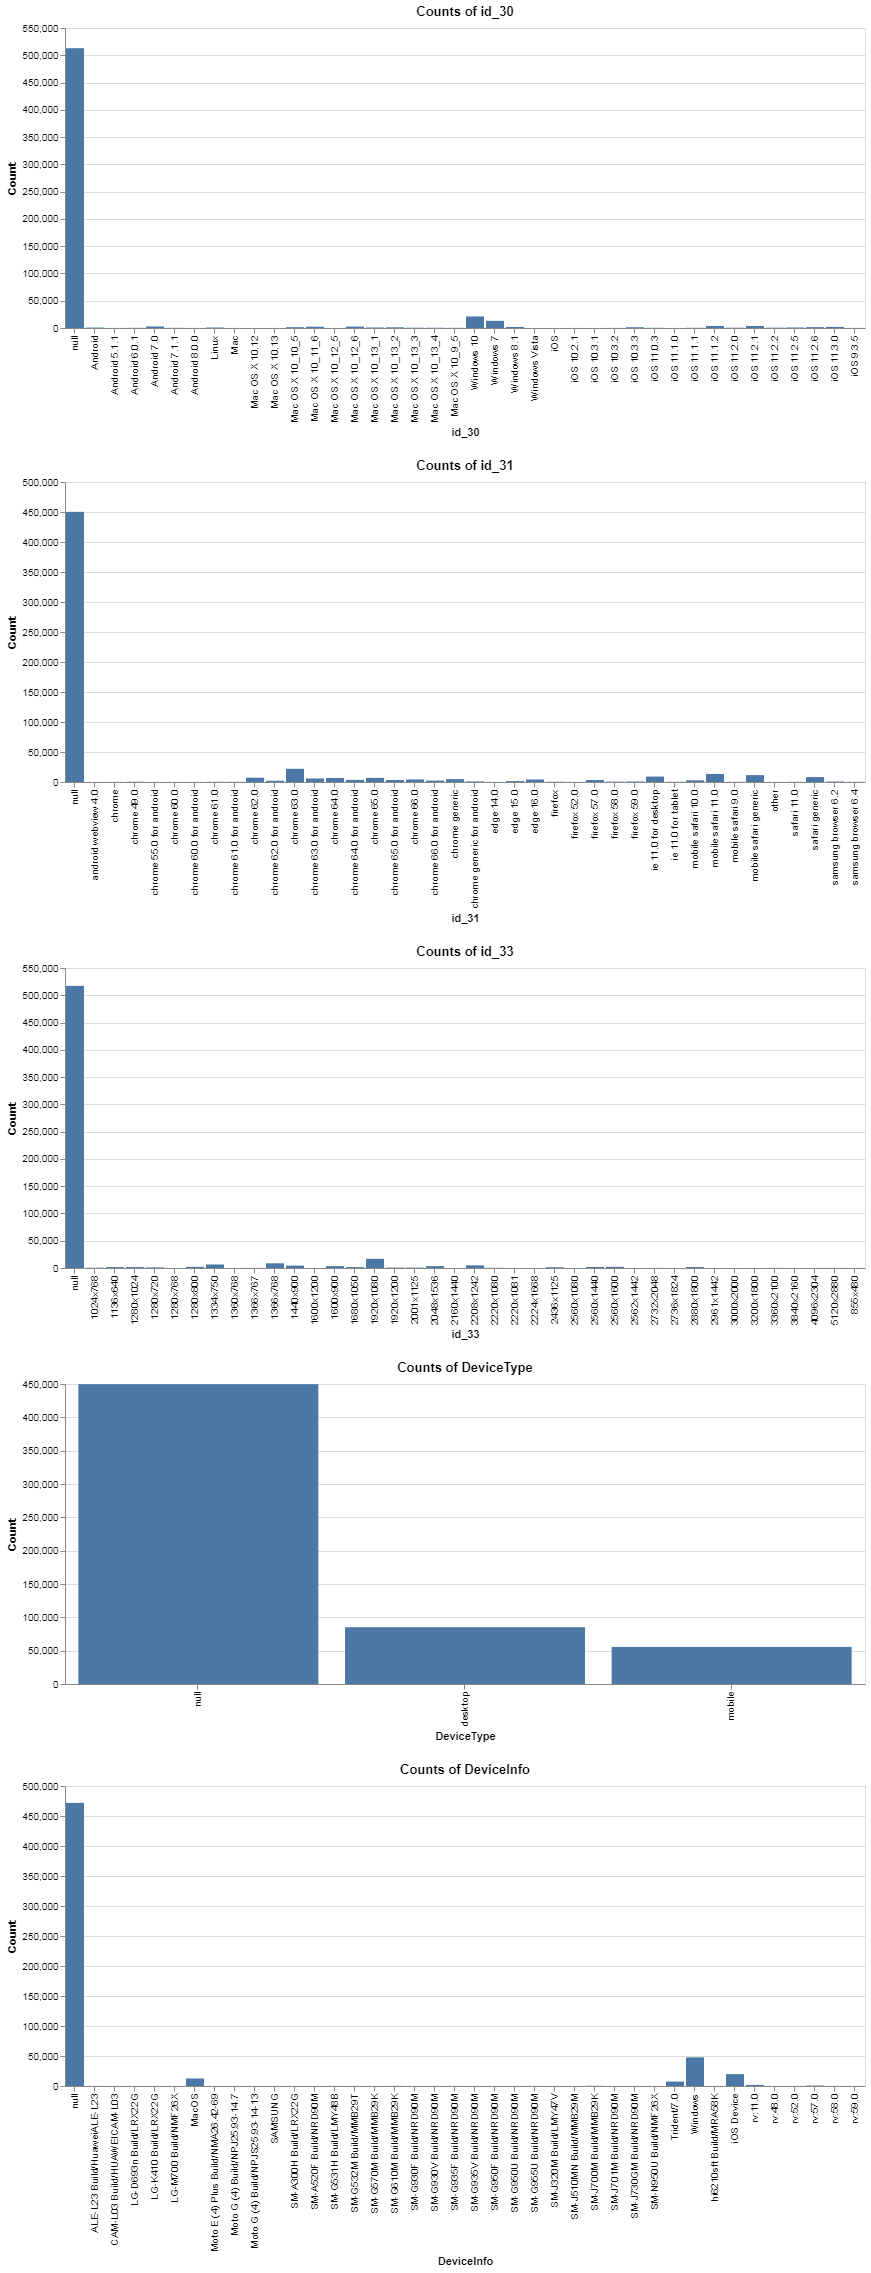

In [11]:
charts = {}
for i in ['id_30', 'id_31', 'id_33', 'DeviceType', 'DeviceInfo']:
    feature_count = ds.X_train[i].value_counts(dropna=False)[:40].reset_index().rename(columns={i: 'count', 'index': i})
    chart = alt.Chart(feature_count).mark_bar().encode(
                x=alt.X(f"{i}:N", axis=alt.Axis(title=i)),
                y=alt.Y('count:Q', axis=alt.Axis(title='Count')),
                tooltip=[i, 'count']
            ).properties(title=f"Counts of {i}", width=800)
    charts[i] = chart
    
charts['id_30'] & charts['id_31'] & charts['id_33'] & charts['DeviceType'] & charts['DeviceInfo']

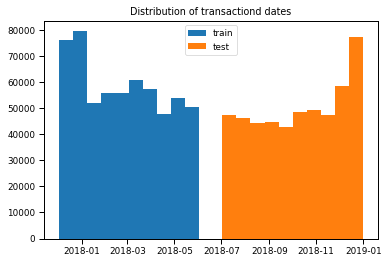

In [12]:
plt.hist(ds.X_train['TransactionDT'], label='train');
plt.hist(ds.X_test['TransactionDT'], label='test');
plt.legend();
plt.title('Distribution of transactiond dates');

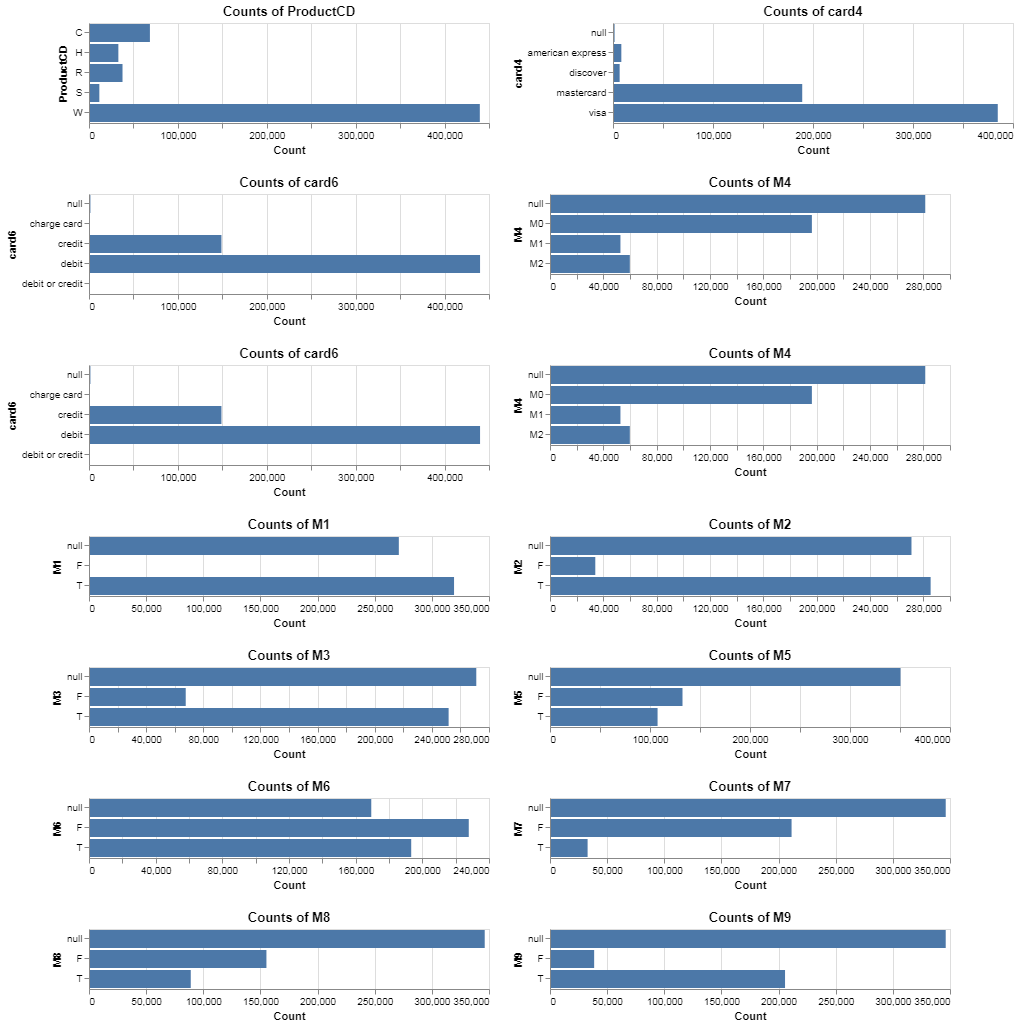

In [13]:
charts = {}
for i in ['ProductCD', 'card4', 'card6', 'M4', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9']:
    feature_count = ds.X_train[i].value_counts(dropna=False).reset_index().rename(columns={i: 'count', 'index': i})
    chart = alt.Chart(feature_count).mark_bar().encode(
                y=alt.Y(f"{i}:N", axis=alt.Axis(title=i)),
                x=alt.X('count:Q', axis=alt.Axis(title='Count')),
                tooltip=[i, 'count']
            ).properties(title=f"Counts of {i}", width=400)
    charts[i] = chart                         
    
(charts['ProductCD'] | charts['card4']) & (charts['card6'] | charts['M4']) & (charts['card6'] | charts['M4']) & (charts['M1'] | charts['M2']) & (charts['M3'] | charts['M5']) & (charts['M6'] | charts['M7']) & (charts['M8'] | charts['M9'])

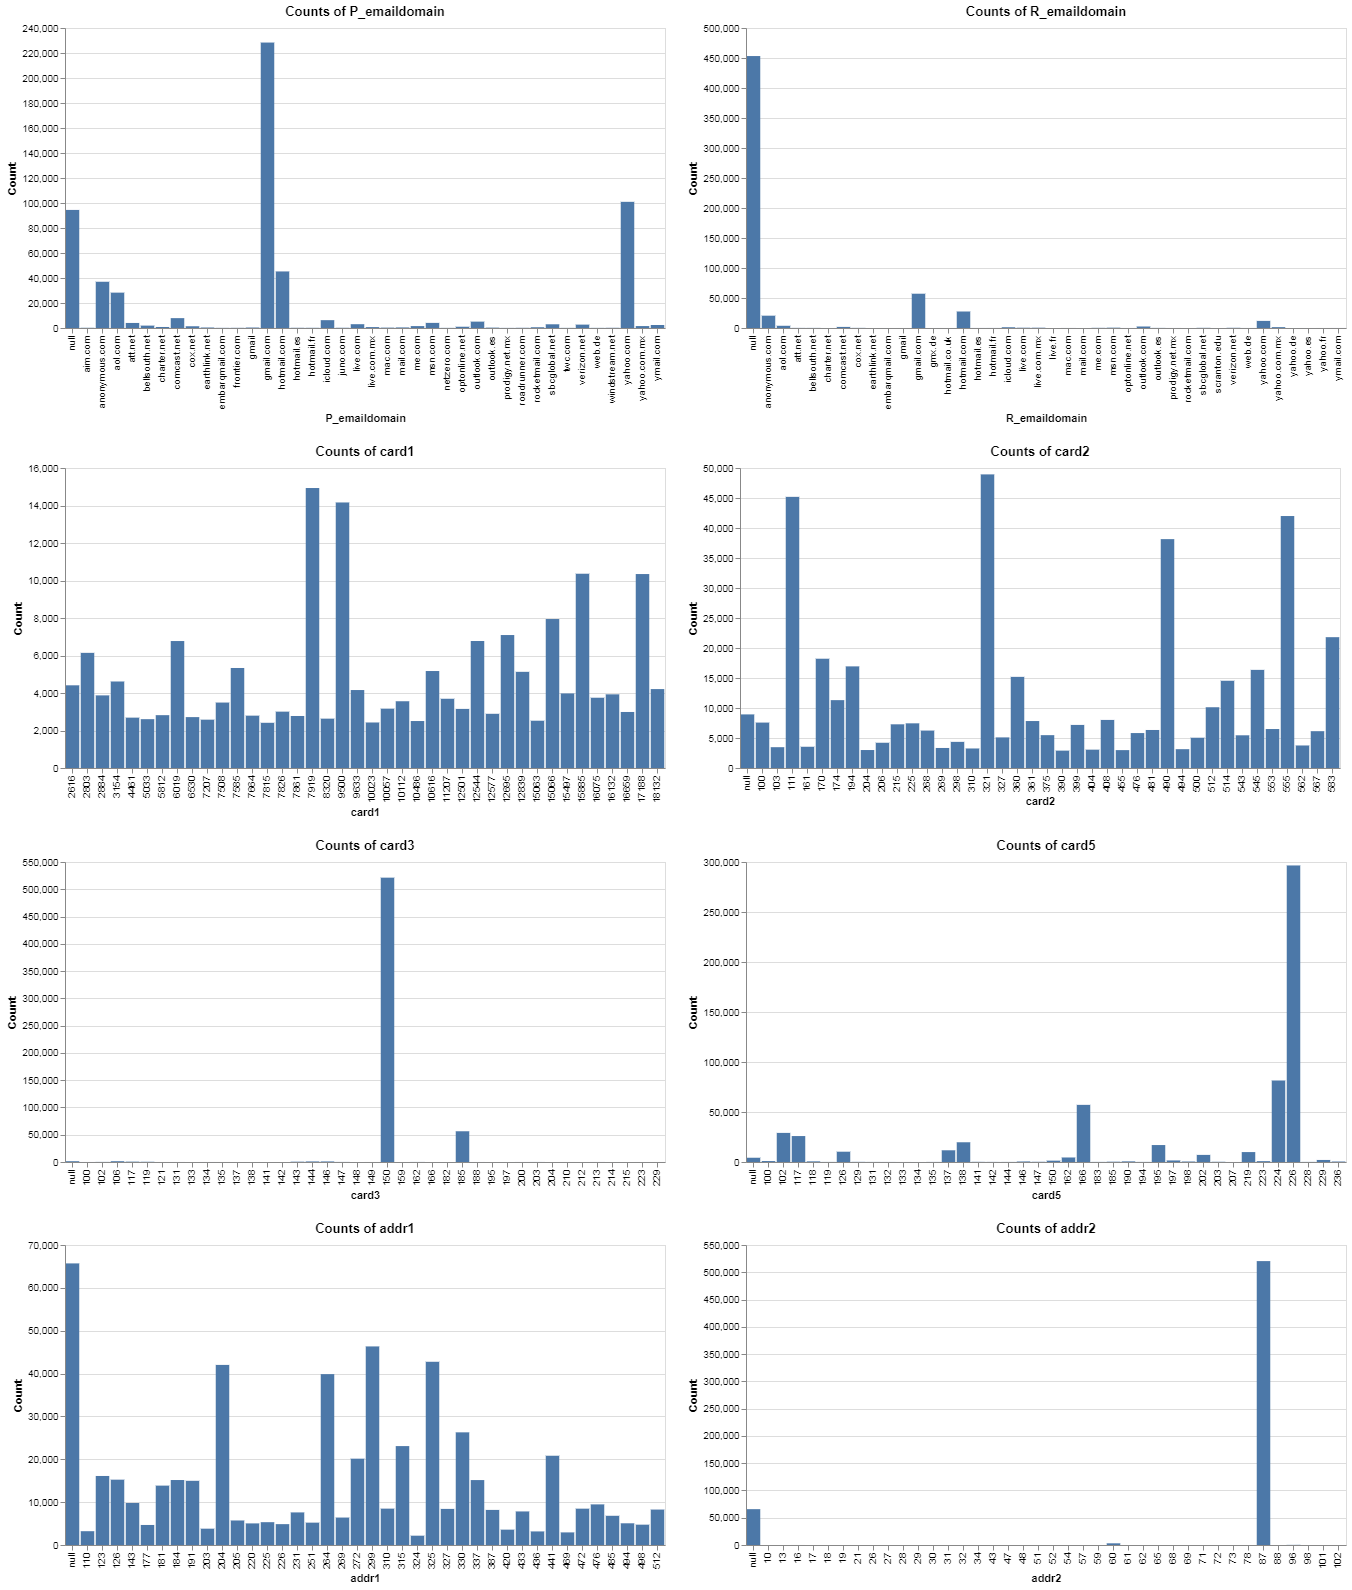

In [14]:
charts = {}
for i in ['P_emaildomain', 'R_emaildomain', 'card1', 'card2', 'card3',  'card5', 'addr1', 'addr2']:
    feature_count = ds.X_train[i].value_counts(dropna=False).reset_index()[:40].rename(columns={i: 'count', 'index': i})
    chart = alt.Chart(feature_count).mark_bar().encode(
                x=alt.X(f"{i}:N", axis=alt.Axis(title=i)),
                y=alt.Y('count:Q', axis=alt.Axis(title='Count')),
                tooltip=[i, 'count']
            ).properties(title=f"Counts of {i}", width=600)
    charts[i] = chart
    
(charts['P_emaildomain'] | charts['R_emaildomain']) & (charts['card1'] | charts['card2']) & (charts['card3'] | charts['card5']) & (charts['addr1'] | charts['addr2'])